## Janelas 

[*********************100%%**********************]  1 of 1 completed


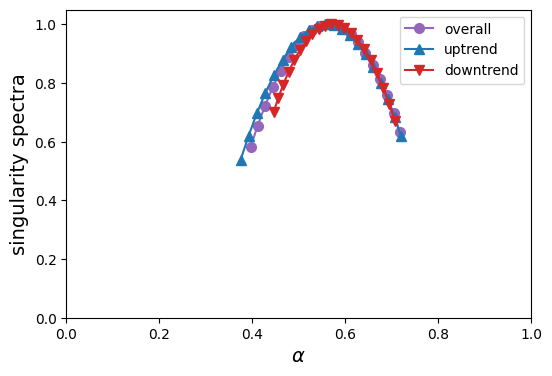

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from mf_adcca import dcca, basic_dcca
# Baixando dados do Bitcoin
btc_data = yf.download("BTC-USD", start="2020-01-01", end="2024-10-01")
daily_return = btc_data['Adj Close'].pct_change().dropna()  # Retornos diários

# Criando um exemplo para BPV_vola_pctchange (pode ser um modelo, ajuste conforme necessário)
# Aqui, apenas como exemplo, vamos simular a volatilidade com retornos aleatórios
np.random.seed(42)  # Para reprodutibilidade
BPV_vola_pctchange = np.random.normal(0, 0.01, size=len(daily_return))  # Simulando volatilidade

# Converta BPV_vola_pctchange em um DataFrame se necessário
BPV_vola_pctchange = pd.Series(BPV_vola_pctchange)

# Dados para DCCA
dat1 = np.copy(daily_return.values)
dat2 = np.copy(BPV_vola_pctchange.values)

# Decide what base of trend to use
trend_base = np.exp(np.cumsum(daily_return.values))  # index-based

fig = plt.figure(figsize=(6, 4))  # Change figure size
plt.xlabel(r'$\alpha$', size=14)
plt.ylabel('singularity spectra', size=14)

# Define q orders
qorders = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]).tolist()  # q is set -5 to 5
qorders_D = (np.array(qorders) + 0.1).tolist()

# Perform DCCA analysis
est_results_xy = basic_dcca(dat1, dat2, Q=qorders, trend_base=trend_base, asymmetry_base='optional')
est_results_Dxy = basic_dcca(dat1, dat2, Q=qorders_D, trend_base=trend_base, asymmetry_base='optional')

# Calculate tau values
tau_xy_overall = est_results_xy[2] * qorders - 1
tau_xy_uptrend = est_results_xy[5] * qorders - 1
tau_xy_downtrend = est_results_xy[8] * qorders - 1

tau_Dxy_overall = est_results_Dxy[2] * qorders_D - 1
tau_Dxy_uptrend = est_results_Dxy[5] * qorders_D - 1
tau_Dxy_downtrend = est_results_Dxy[8] * qorders_D - 1

# Calculate alpha values
alpha_xy_overall = (tau_Dxy_overall - tau_xy_overall) / 0.1
alpha_xy_uptrend = (tau_Dxy_uptrend - tau_xy_uptrend) / 0.1
alpha_xy_downtrend = (tau_Dxy_downtrend - tau_xy_downtrend) / 0.1

# Plotting the results
plt.plot(alpha_xy_overall, qorders * alpha_xy_overall - tau_xy_overall, marker="o", markersize=7, linestyle='solid', label='overall', color='#9467bd')
plt.plot(alpha_xy_uptrend, qorders * alpha_xy_uptrend - tau_xy_uptrend, marker="^", markersize=7, linestyle='solid', label='uptrend', color='#1f77b4')
plt.plot(alpha_xy_downtrend, qorders * alpha_xy_downtrend - tau_xy_downtrend, marker="v", markersize=7, linestyle='solid', label='downtrend', color='#d62728')

# Legend and limits
legend = plt.legend(frameon=True)
plt.xlim(0, 1)
plt.ylim(0, 1.05)  # Change plot limits if necessary

# Save as pdf (uncomment to save)
# plt.savefig('DCCA_results.pdf', bbox_inches="tight")
plt.show()


In [2]:
# delta alpha (degree of  multifractality)
display(np.max(alpha_xy_uptrend)-np.min(alpha_xy_uptrend))
display(np.max(alpha_xy_downtrend)-np.min(alpha_xy_downtrend))
display(np.max(alpha_xy_overall)-np.min(alpha_xy_overall))

np.float64(0.34440325015486106)

np.float64(0.2610723326159281)

np.float64(0.3209593954336132)

In [5]:
# asymmetric degree of  singularity spectra

#display(alpha_xy_overall, qorders*alpha_xy_overall - tau_xy_overall)

# overall
# alpha_0, alpha_max, min
f_alpha = qorders*alpha_xy_overall - tau_xy_overall
display('alpha_0:', alpha_xy_overall[(f_alpha==1)][0], 'max:', np.max(alpha_xy_overall), 'min:', np.min(alpha_xy_overall))
# A_alpha
delL = alpha_xy_overall[(f_alpha==1)][0] - np.min(alpha_xy_overall)
delR = np.max(alpha_xy_overall) - alpha_xy_overall[(f_alpha==1)][0]
display('A_alpha:', (delL-delR)/(delL+delR))
display('--------uptrend-----------')

# uptrend
# alpha_0, alpha_max, min
f_alpha = qorders*alpha_xy_uptrend - tau_xy_uptrend
display('alpha_0:', alpha_xy_uptrend[(f_alpha==1)][0], 'max:', np.max(alpha_xy_uptrend), 'min:', np.min(alpha_xy_uptrend))
# A_alpha
delL = alpha_xy_uptrend[(f_alpha==1)][0] - np.min(alpha_xy_uptrend)
delR = np.max(alpha_xy_uptrend) - alpha_xy_uptrend[(f_alpha==1)][0]
display('A_alpha:', (delL-delR)/(delL+delR))
display('-------downtrend------------')

# downtrend
# alpha_0, alpha_max, min
f_alpha = qorders*alpha_xy_downtrend - tau_xy_downtrend
display('alpha_0:', alpha_xy_downtrend[(f_alpha==1)][0], 'max:', np.max(alpha_xy_downtrend), 'min:', np.min(alpha_xy_downtrend))
# A_alpha
delL = alpha_xy_downtrend[(f_alpha==1)][0] - np.min(alpha_xy_downtrend)
delR = np.max(alpha_xy_downtrend) - alpha_xy_downtrend[(f_alpha==1)][0]
display('A_alpha:', (delL-delR)/(delL+delR))

'alpha_0:'

np.float64(0.5627998688834956)

'max:'

np.float64(0.717450146971288)

'min:'

np.float64(0.39649075153767477)

'A_alpha:'

np.float64(0.036324966409777754)

'--------uptrend-----------'

'alpha_0:'

np.float64(0.5571949641086882)

'max:'

np.float64(0.7193382690590688)

'min:'

np.float64(0.3749350189042078)

'A_alpha:'

np.float64(0.05841013476224253)

'-------downtrend------------'

'alpha_0:'

np.float64(0.5701936816441067)

'max:'

np.float64(0.7072519177885361)

'min:'

np.float64(0.44617958517260803)

'A_alpha:'

np.float64(-0.049963699876694655)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from mf_adcca import basic_dcca
import matplotlib.pyplot as plt
from arch import arch_model

# Baixando os dados do Bitcoin
btc_data = yf.download("BTC-USD", start="2020-01-01", end="2023-02-01")
daily_return = btc_data['Adj Close'].pct_change().dropna()

# Definir o intervalo de 3 anos e descolá-lo diariamente a partir de 2023
D_xy_series = []
delta_alpha_series = []

# Definindo as ordens de q para o cálculo de DCCA
qorders = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
qorders_D = (qorders + 0.1).tolist()

# Base indexada (a tendência base)
trend_base = np.exp(np.cumsum(daily_return.values))

# Loop para deslocar o intervalo de 3 anos diariamente em 2023-2024
for i in range(len(btc_data.loc['2023-01-01':])):
    # Definir datas de início e fim com base nos 3 anos anteriores ao índice atual
    end_date = btc_data.index[i + len(btc_data.loc['2020-01-01':'2022-12-31'])]
    start_date = end_date - pd.DateOffset(years=3)
    
    # Verifique se o intervalo de tempo existe para o cálculo
    if start_date not in btc_data.index or end_date not in btc_data.index:
        continue  # pula o loop se o intervalo não existir
    
    # Seleciona os dados dentro do intervalo de 3 anos
    btc_data_window = btc_data.loc[start_date:end_date]
    daily_return_window = btc_data_window['Adj Close'].pct_change().dropna()

    # Ajustar o modelo TGARCH para o cálculo da volatilidade condicional
    model = arch_model(daily_return_window, mean="Zero", vol="Garch", p=1, o=1, q=1, power=1.0)
    result = model.fit(disp="off")
    conditional_vol = result.conditional_volatility

    # Transformação da volatilidade condicional para usar no cálculo multifractal
    BPV_vola_window = np.log(conditional_vol) - np.log(conditional_vol.shift(1))
    BPV_vola_window = BPV_vola_window.dropna().values  # Remove valores NaN

    # Executar o cálculo de DCCA no intervalo de 3 anos
    dat1 = np.copy(daily_return_window[1:].values)
    dat2 = np.copy(BPV_vola_window)

    print(len(dat1))
    print(len(dat2))
    # Realizando a análise multifractal assimétrica
    est_results_xy = basic_dcca(dat1, dat2, Q=qorders.tolist(), trend_base=trend_base, asymmetry_base='optional')
    est_results_Dxy = basic_dcca(dat1, dat2, Q=qorders_D, trend_base=trend_base, asymmetry_base='optional')

    # Calcular tau values
    tau_xy_overall = est_results_xy[2] * qorders - 1
    tau_xy_uptrend = est_results_xy[5] * qorders - 1
    tau_xy_downtrend = est_results_xy[8] * qorders - 1

    tau_Dxy_overall = est_results_Dxy[2] * qorders_D - 1
    tau_Dxy_uptrend = est_results_Dxy[5] * qorders_D - 1
    tau_Dxy_downtrend = est_results_Dxy[8] * qorders_D - 1

    # Calcular alpha values
    alpha_xy_overall = (tau_Dxy_overall - tau_xy_overall) / 0.1
    alpha_xy_uptrend = (tau_Dxy_uptrend - tau_xy_uptrend) / 0.1
    alpha_xy_downtrend = (tau_Dxy_downtrend - tau_xy_downtrend) / 0.1

    # Calcular D_(xy)
    D_xy = 0.5 * (np.abs(tau_xy_overall[0] - 0.5) + np.abs(tau_xy_overall[-1] - 0.5))
    D_xy_series.append(D_xy)

    # Calcular delta alpha (grau de multifractalidade)
    delta_alpha = np.max(alpha_xy_uptrend) - np.min(alpha_xy_uptrend)
    delta_alpha_series.append(delta_alpha)

# Convertendo os resultados em séries temporais
dates = btc_data.loc['2023-01-01':].index[:len(D_xy_series)]
D_xy_series = pd.Series(D_xy_series, index=dates)
delta_alpha_series = pd.Series(delta_alpha_series, index=dates)

# Exibindo os resultados
print("D_(xy) Series:")
print(D_xy_series.head())
print("\nDelta Alpha Series:")
print(delta_alpha_series.head())

# Visualizando as séries temporais
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(D_xy_series, label='D_(xy)', color='blue')
plt.title('D_(xy) ao longo do tempo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delta_alpha_series, label='Delta Alpha (Multifractality)', color='green')
plt.title('Delta Alpha ao longo do tempo')
plt.legend()

plt.tight_layout()
plt.show()


D_(xy) Series:
Date
2023-01-01    2.703737
2023-01-02    2.697953
2023-01-03    2.685893
2023-01-04    2.711239
2023-01-05    2.712781
dtype: float64

Delta Alpha Series:
Date
2023-01-01    0.525333
2023-01-02    0.504966
2023-01-03    0.472632
2023-01-04    0.391286
2023-01-05    0.370633
dtype: float64


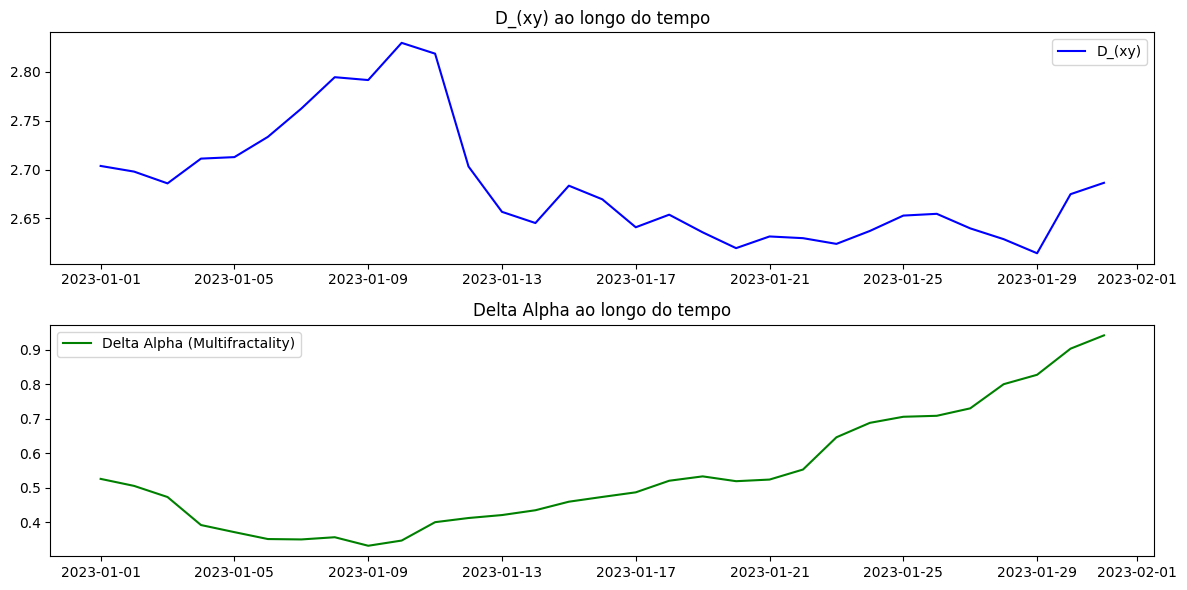

In [30]:
# Exibindo os resultados
print("D_(xy) Series:")
print(D_xy_series.head())
print("\nDelta Alpha Series:")
print(delta_alpha_series.head())

# Visualizando as séries temporais
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(D_xy_series, label='D_(xy)', color='blue')
plt.title('D_(xy) ao longo do tempo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delta_alpha_series, label='Delta Alpha (Multifractality)', color='green')
plt.title('Delta Alpha ao longo do tempo')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


D_(xy) Series:
Date
2023-01-01    2.760622
2023-01-02    2.772672
2023-01-03    2.554179
2023-01-04    2.823737
2023-01-05    2.864148
dtype: float64

Delta Alpha Series:
Date
2023-01-01    0.321741
2023-01-02    0.226438
2023-01-03    0.137032
2023-01-04    0.151805
2023-01-05    0.132914
dtype: float64


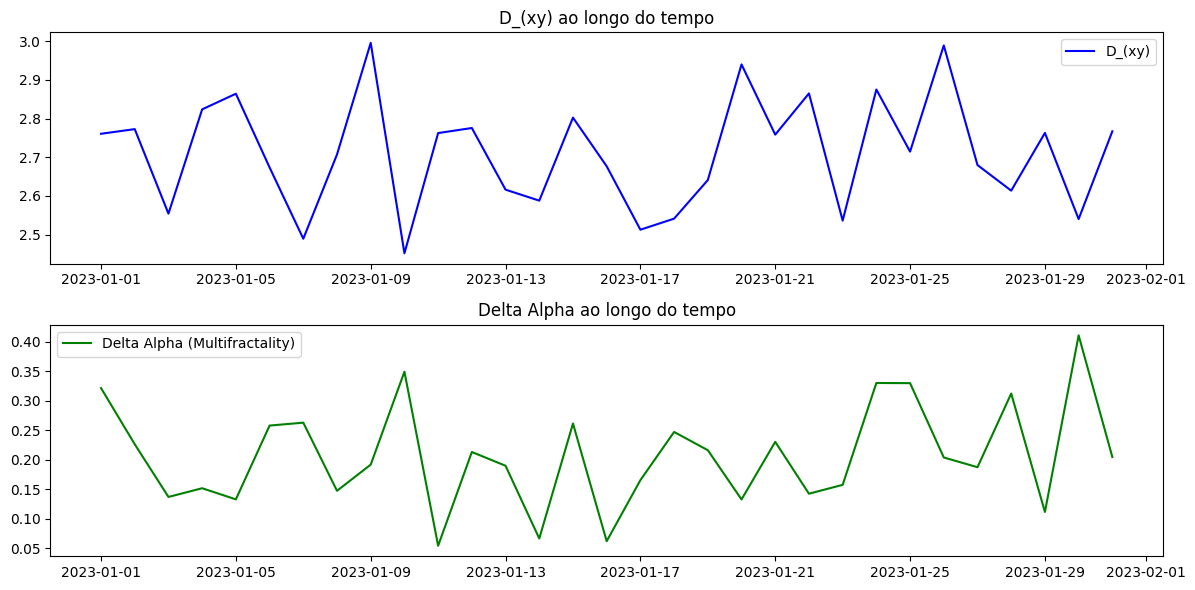

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
from mf_adcca import basic_dcca
import matplotlib.pyplot as plt

# Baixando os dados do Bitcoin
btc_data = yf.download("BTC-USD", start="2020-01-01", end="2023-02-01")
daily_return = btc_data['Adj Close'].pct_change().dropna()

# Definir o intervalo de 3 anos e descolá-lo diariamente a partir de 2023
D_xy_series = []
delta_alpha_series = []

# Definindo as ordens de q para o cálculo de DCCA
qorders = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
qorders_D = (qorders + 0.1).tolist()

# Base indexada (a tendência base)
trend_base = np.exp(np.cumsum(daily_return.values))

# Loop para deslocar o intervalo de 3 anos diariamente em 2023-2024
for i in range(len(btc_data.loc['2023-01-01':])):
    # Definir datas de início e fim com base nos 3 anos anteriores ao índice atual
    end_date = btc_data.index[i + len(btc_data.loc['2020-01-01':'2022-12-31'])]
    start_date = end_date - pd.DateOffset(years=3)
    
    # Verifique se o intervalo de tempo existe para o cálculo
    if start_date not in btc_data.index or end_date not in btc_data.index:
        continue  # pula o loop se o intervalo não existir
    
    # Seleciona os dados dentro do intervalo de 3 anos
    btc_data_window = btc_data.loc[start_date:end_date]
    daily_return_window = btc_data_window['Adj Close'].pct_change().dropna()

    # Simular a volatilidade com retornos aleatórios (ou utilize dados reais se tiver)
    BPV_vola_window = np.random.normal(0, 0.01, size=len(daily_return_window))

    # Executar o cálculo de DCCA no intervalo de 3 anos
    dat1 = np.copy(daily_return_window.values)
    dat2 = np.copy(BPV_vola_window)

    # Realizando a análise multifractal assimétrica
    est_results_xy = basic_dcca(dat1, dat2, Q=qorders.tolist(), trend_base=trend_base, asymmetry_base='optional')
    est_results_Dxy = basic_dcca(dat1, dat2, Q=qorders_D, trend_base=trend_base, asymmetry_base='optional')

    # Calcular tau values
    tau_xy_overall = est_results_xy[2] * qorders - 1
    tau_xy_uptrend = est_results_xy[5] * qorders - 1
    tau_xy_downtrend = est_results_xy[8] * qorders - 1

    tau_Dxy_overall = est_results_Dxy[2] * qorders_D - 1
    tau_Dxy_uptrend = est_results_Dxy[5] * qorders_D - 1
    tau_Dxy_downtrend = est_results_Dxy[8] * qorders_D - 1

    # Calcular alpha values
    alpha_xy_overall = (tau_Dxy_overall - tau_xy_overall) / 0.1
    alpha_xy_uptrend = (tau_Dxy_uptrend - tau_xy_uptrend) / 0.1
    alpha_xy_downtrend = (tau_Dxy_downtrend - tau_xy_downtrend) / 0.1

    # Calcular D_(xy)
    D_xy = 0.5 * (np.abs(tau_xy_overall[0] - 0.5) + np.abs(tau_xy_overall[-1] - 0.5))
    D_xy_series.append(D_xy)

    # Calcular delta alpha (grau de multifractalidade)
    delta_alpha = np.max(alpha_xy_uptrend) - np.min(alpha_xy_uptrend)
    delta_alpha_series.append(delta_alpha)

# Convertendo os resultados em séries temporais
dates = btc_data.loc['2023-01-01':].index[:len(D_xy_series)]
D_xy_series = pd.Series(D_xy_series, index=dates)
delta_alpha_series = pd.Series(delta_alpha_series, index=dates)

# Exibindo os resultados
print("D_(xy) Series:")
print(D_xy_series.head())
print("\nDelta Alpha Series:")
print(delta_alpha_series.head())

# Visualizando as séries temporais
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(D_xy_series, label='D_(xy)', color='blue')
plt.title('D_(xy) ao longo do tempo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delta_alpha_series, label='Delta Alpha (Multifractality)', color='green')
plt.title('Delta Alpha ao longo do tempo')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
delta_alpha_series

## volatilidade 

### Kakinaka and Umeno

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

# Função para calcular o Realized Bipower Variation (BPV)
def calculate_bpv(returns):
    return np.sum(np.abs(returns[:-1]) * np.abs(returns[1:]))

# Função para realizar testes ADF e KPSS
def stationarity_tests(log_volatility):
    adf_result = adfuller(log_volatility)
    kpss_result = kpss(log_volatility, regression='c')
    
    print(f'ADF Test Statistic: {adf_result[0]}, p-value: {adf_result[1]}')
    print(f'KPSS Test Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

# Função para processar a série de uma criptomoeda
def process_crypto(ticker):
    # Baixar os dados históricos da criptomoeda de Yahoo Finance com intervalo diário
    crypto_data = yf.download(ticker, start="2024-8-10", end="2024-9-10", interval='1d')

    # Calcular retornos logarítmicos
    crypto_data['Returns'] = np.log(crypto_data['Close']).diff()
    
    # Remover valores NaN resultantes do cálculo de diferença
    crypto_data.dropna(inplace=True)

    # Calcular BPV (Realized Bipower Variation)
    bpv = calculate_bpv(crypto_data['Returns'].values)

    # Calcular volatilidade
    volatility = np.sqrt(bpv)

    # Log-volatilidade e suas diferenças
    log_volatility = np.log(volatility)

    # Realizar testes de estacionariedade
    #stationarity_tests(log_volatility)

    # Plotar preços e retornos
    plt.figure(figsize=(10, 6))
    plt.plot(crypto_data['Close'], label=f'{ticker} Prices')
    plt.title(f'{ticker} Prices')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(crypto_data['Returns'], label=f'{ticker} Log Returns')
    plt.title(f'{ticker} Log Returns')
    plt.legend()
    plt.show()

# Lista de criptomoedas (contra USDT)
crypto_list = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD']

# Processar cada criptomoeda
for crypto in crypto_list:
    print(f'\nProcessing {crypto}...\n')
    process_crypto(crypto)


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model


# Definir o modelo TGARCH (1,1)
model = arch_model(petr['return'], mean="Zero", p=1, o=1, q=1, power=1.0)

# Ajustar o modelo
result = model.fit(disp="off")

# Exibir o resumo do ajuste do modelo
print(result.summary())

# Calcular a volatilidade condicional
conditional_vol = result.conditional_volatility

vi_t = np.log(conditional_vol) - np.log(conditional_vol.shift(1))

print(vi_t.head())


In [ ]:
len(conditional_vol)

### NFTs, DeFi, and other assets efficiency and volatility dynamics: An asymmetric multifractality analysis☆

In [6]:
from arch import arch_model
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Busca os preços ajustados de PETR4
#petr = pdr.get_data_yahoo('PETR4.SA', start = '2018-01-01')[['Adj Close']]
petr  = yf.download("BTC-USD",start="2020-01-01", end="2023-02-01")
# Transforma em retornos contínuos
petr['return'] = np.log(petr[['Adj Close']]) - np.log(petr[['Adj Close']].shift(1))

# Retira os dados faltantes
petr = petr.dropna()

[*********************100%%**********************]  1 of 1 completed


In [8]:
# Especifica o modelo
petr_gm = arch_model(petr['return'], p = 1, q = 1,
                     mean = 'constant', vol = 'GARCH', dist = 'normal')

# Roda o modelo
petr_fit = petr_gm.fit(disp = 'off')

c:\Users\limam\Documents\Programação\Python\Projetos\Streamlit_Apps\Fractal\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001481. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2102.19
Distribution:                  Normal   AIC:                          -4196.38
Method:            Maximum Likelihood   BIC:                          -4176.28
                                        No. Observations:                 1126
Date:                Tue, Oct 29 2024   Df Residuals:                     1125
Time:                        08:53:10   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.4

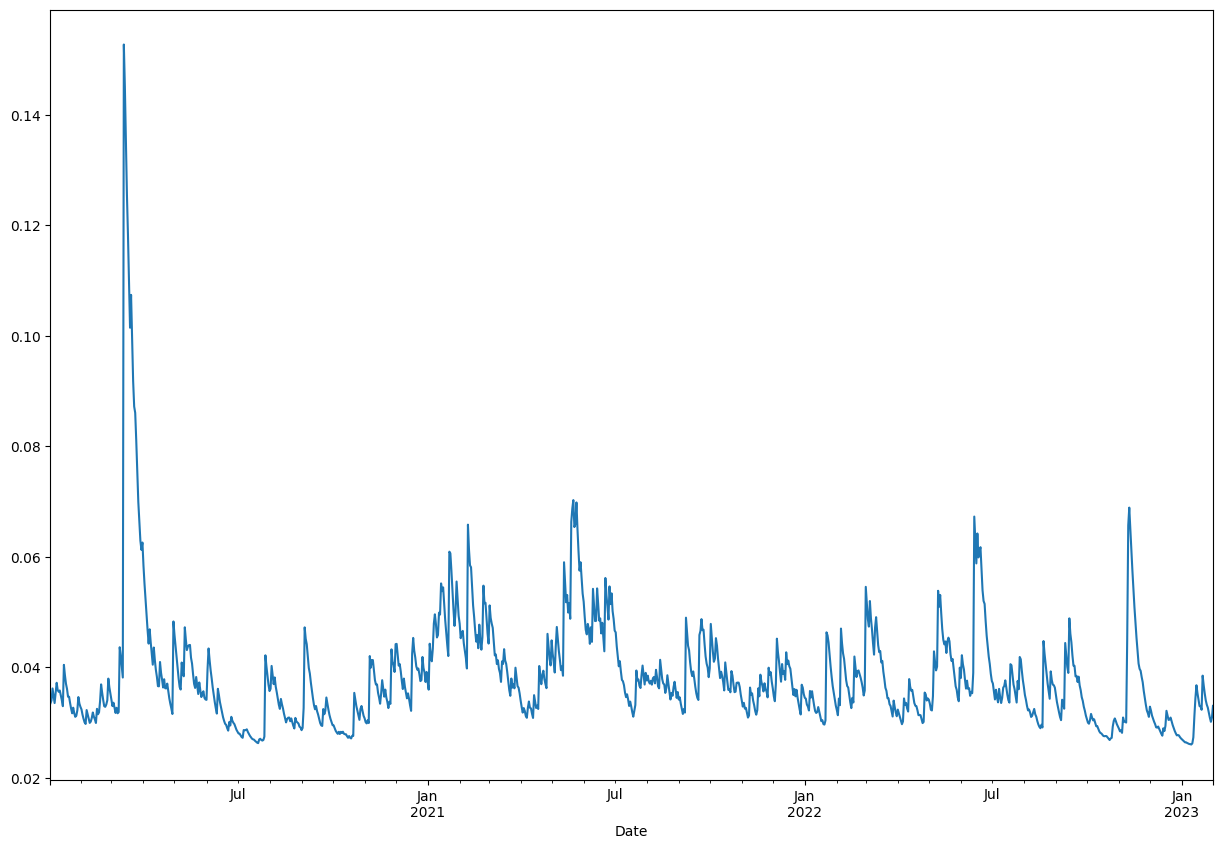

In [11]:
# Plota 
plt.figure(figsize=(15,10))
petr_fit.conditional_volatility.plot()

petr_fit.params

petr_fit.summary

# Previsão
#petr_forecast = petr_fit.forecast(horizon = 100, reindex = False)
#petr_forecast.variance

#### TARCH/ZARCH

In [12]:
import pandas as pd
import numpy as np
from arch import arch_model


# Definir o modelo TGARCH (1,1)
petr  = yf.download("BTC-USD",start="2020-01-01", end="2023-02-01")

model = arch_model(petr['return'], mean="Zero", p=1, o=1, q=1, power=1.0)

# Ajustar o modelo
result = model.fit(disp="off")

# Exibir o resumo do ajuste do modelo
print(result.summary())

# Calcular a volatilidade condicional
conditional_vol = result.conditional_volatility

vi_t = np.log(conditional_vol) - np.log(conditional_vol.shift(1))

print(vi_t.head())


                    Zero Mean - TARCH/ZARCH Model Results                     
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                TARCH/ZARCH   Log-Likelihood:                2118.51
Distribution:                  Normal   AIC:                          -4229.01
Method:            Maximum Likelihood   BIC:                          -4208.91
                                        No. Observations:                 1126
Date:                Tue, Oct 29 2024   Df Residuals:                     1126
Time:                        08:54:31   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.3162e-03  2.000e-03      1.658  9.725e-02 

c:\Users\limam\Documents\Programação\Python\Projetos\Streamlit_Apps\Fractal\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001481. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Axes: xlabel='Date'>

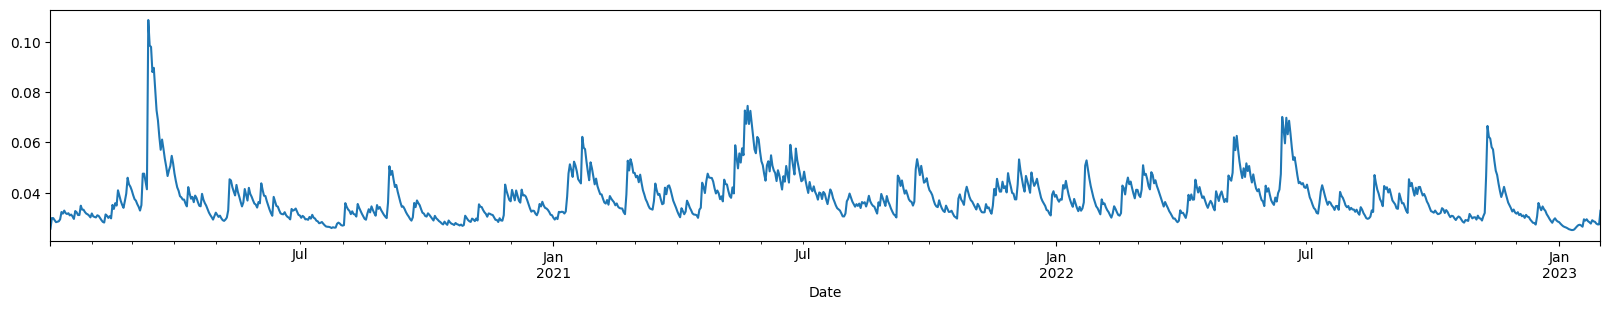

In [13]:
plt.figure(figsize=(20,3))
result.conditional_volatility.plot()

In [22]:
vi_t.dropna()

Date
2020-01-03    1.520204e-01
2020-01-04   -6.295975e-04
2020-01-05   -2.642800e-02
2020-01-06   -2.898295e-02
2020-01-07    5.578934e-03
                  ...     
2023-01-27   -7.268299e-03
2023-01-28   -2.482187e-02
2023-01-29   -1.170518e-02
2023-01-30    1.738161e-07
2023-01-31    1.816338e-01
Name: cond_vol, Length: 1125, dtype: float64

In [ ]:
# Função para calcular a volatilidade com o modelo GARCH (1,1)
def calculate_garch_volatility(data):
    petr_gm = arch_model(data, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
    petr_fit = petr_gm.fit(disp='off')
    return petr_fit.conditional_volatility

# Função para calcular a volatilidade com o modelo TGARCH (1,1,2)
def calculate_tgarch_volatility(data):
    model = arch_model(data, mean="Zero", p=1, o=1, q=1, power=1.0)
    result = model.fit(disp="off")
    return result.conditional_volatility

# Configuração do Streamlit
st.title("Escolha o Modelo de Volatilidade")

# Opções de modelo
model_choice = st.selectbox("Selecione o modelo para cálculo de volatilidade", ["GARCH", "TGARCH"])

# Exibir dados
st.write("Dados dos retornos:")
st.line_chart(petr['return'])

# Cálculo e exibição do resultado com base no modelo escolhido
if model_choice == "GARCH":
    st.write("Volatilidade Condicional - Modelo GARCH:")
    vol_garch = calculate_garch_volatility(petr)
    st.line_chart(vol_garch)
elif model_choice == "TGARCH":
    st.write("Volatilidade Condicional - Modelo TGARCH:")
    vol_tgarch = calculate_tgarch_volatility(petr)
    st.line_chart(vol_tgarch)

# Calcular vi_t (diferencial logarítmico da volatilidade condicional) para o TGARCH
if model_choice == "TGARCH":
    vi_t = np.log(vol_tgarch) - np.log(vol_tgarch.shift(1))
    st.write("Diferencial Logarítmico da Volatilidade Condicional (vi_t):")
    st.line_chart(vi_t)
